### 아이디어
- 구간합 세그트리를 이용한다.
- 쿼리 1번을 수행할 때 부모 노드를 k * (j - i + 1)만큼 더하고, 좌우 자식을 살피면서 각각 i와 j의 범위안에 있으면 곱해야 할 숫자를 아래로 내리면서 재귀돌리면 될 것 같다.
  - 이러면 쿼리가 $O(logN)$가 되므로 풀 수 있을 것이다
- `1 i j k: Ai, Ai+1, ..., Aj`에 k를 더한다.
  - 이는 `[i, j]`를 의미한다. 
  - `[i, j)`를 표현하고자 한다면 `1 i j k: Ai, Ai+1, ..., Aj-1`에 k로 표현될 것이다.
- 근데 왜 이게 세그먼트 트리문제지?
  - 애초에 문제는 구간합의 출력을 요구하지 않는다. 뭔가 접근이 잘못됐다.
  - 심지어 틀렸다. 이유를 모르겠다.

In [ ]:
import sys, io, os
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

class ST:
  def __init__(self, L, default, f):
    self._def = default
    self._f = f
    self._len = len(L)
    self._size = _size = 1 << (self._len - 1).bit_length()

    self.L = [default] * (2 * _size)
    self.L[_size:_size + self._len] = L
    for i in reversed(range(_size)):
      self.L[i] = f(self.L[i + i], self.L[i + i + 1])

  def __delitem__(self, idx):
    self[idx] = self._def

  def __getitem__(self, idx):
    return self.L[idx + self._size]

  def __setitem__(self, idx, value):
    idx += self._size
    self.L[idx] = value
    idx >>= 1
    while idx:
      self.L[idx] = self._f(self.L[2 * idx], self.L[2 * idx + 1])
      idx >>= 1

  def __len__(self):
    return self._len

  def query(self, s, e):
    s += self._size
    e += self._size

    l = r = self._def
    while s < e: 
      if s & 1:
        l = self._f(l, self.L[s])
        s += 1
      if e & 1:
        e -= 1
        r = self._f(self.L[e], r)
      s >>= 1
      e >>= 1

    return self._f(l, r)

  def query2(self, s, e, i, k, mid) : 
    #i=1일 때 root가 있고, 2배 하면 좌자식, 2배+1 하면 우자식
    n = e - s + 1
    self.L[i] += n * k
    if i >= self._size : return #리프 노드를 업데이트 한 다음 종료
    if s > mid :
      pass
    else :
      self.query2(s, min(e, mid), 2*i, k, mid - mid//2)
    if mid + 1 > e :
      pass
    else :
      self.query2(max(s, mid + 1), e, 2*i + 1, k, mid + mid//2)

def sol() :
  input()
  st = ST([*map(int, input().split())], 0, lambda x, y: x + y)
  for _ in range(int(input())) :
    Q, *args = map(int, input().split())
    if Q == 1 :
      s, e, k = args
      st.query2(s, e, 1, k, st._size // 2)
    elif Q == 2 :
      x = args[0]
      sys.stdout.write(str(st[x-1]) + '\n')

sol()


### 풀이
- Difference Array라고 하는 것 같다.
- 변화량을 기록하는 세그트리를 구축한다.
  - 1번 쿼리때 L의 변화량을 세그먼트 트리에 기록한다.
    - `[s, e]`에 k를 더한다는 것을 변화량의 관점에서 표시한다면 이렇다.
      - 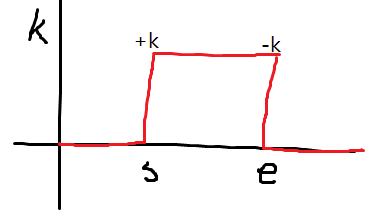
      - 변화량을 기록하는 것이니 2차식으로 봐도 될지도 모르겠다.
  - 2번 쿼리때 `L[x]`에서 세그먼트 트리의 `L[x]`번째에 해당하는 변화량을 더한 것을 출력한다.
- 변화량을 더할 땐 list크기를 +1만큼 더해야 하는것도 잊으면 안된다.
- 출력이 구간합이였다면 Lazy propagation 기법을 사용해야 한다고 한다.

In [ ]:
import sys, io, os
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

class ST:
  def __init__(self, L, default, f):
    self._def = default
    self._f = f
    self._len = len(L)
    self._size = _size = 1 << (self._len - 1).bit_length()

    self.L = [default] * (2 * _size)
    self.L[_size:_size + self._len] = L
    for i in reversed(range(_size)):
      self.L[i] = f(self.L[i + i], self.L[i + i + 1])

  def __delitem__(self, idx):
    self[idx] = self._def

  def __getitem__(self, idx):
    return self.L[idx + self._size]

  def __setitem__(self, idx, value):
    idx += self._size
    self.L[idx] = value
    idx >>= 1
    while idx:
      self.L[idx] = self._f(self.L[2 * idx], self.L[2 * idx + 1])
      idx >>= 1

  def __len__(self):
    return self._len

  def query(self, s, e):
    s += self._size
    e += self._size

    l = r = self._def
    while s < e: 
      if s & 1:
        l = self._f(l, self.L[s])
        s += 1
      if e & 1:
        e -= 1
        r = self._f(self.L[e], r)
      s >>= 1
      e >>= 1

    return self._f(l, r)

def sol() :
  N = int(input())
  L = [*map(int, input().split())]
  st = ST([0] * N, 0, lambda x, y: x + y)
  for _ in range(int(input())) :
    Q, *args = map(int, input().split())
    if Q == 1 :
      s, e, k = args
      st[s-1] += k
      st[e] -= k
    elif Q == 2 :
      x = args[0]
      answer = L[x-1] + st.query(0, x)
      sys.stdout.write(str(answer) + '\n')

sol()